Целью этого ноутбука является оценка аккуратности между Random Forest, Bagging Classifier, Logistic Regression и GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel('unknown_dataset.xlsx')
df

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var22,var23,var24,var25,var26,var27,var28,var29,var30,target
0,-2.177011,-6.226248,-4.180724,-0.301575,0.312956,2.072484,-0.431621,11.231389,2.647677,-1.255365,...,-2.177011,7.461246,2.547404,-4.967362,1.907483,1.692546,-3.468058,-8.705446,-1.128374,0
1,-2.091911,-6.166519,2.630665,-2.710098,-6.709456,-9.957898,1.572536,-3.160593,0.800949,-1.731416,...,-2.091911,-1.825861,-1.357695,3.462102,-0.292048,-1.820714,-4.606010,8.642310,-1.561423,1
2,2.371305,17.347923,-1.361822,0.129764,0.006112,3.565529,-0.048206,1.842185,-2.963972,0.629045,...,2.371305,-4.719132,-1.798156,-0.254512,-7.593664,0.170942,-1.080999,1.496065,2.593735,0
3,0.190427,-3.864422,-1.502271,0.523183,-1.767517,-2.963652,1.307273,3.199642,0.182576,-1.424840,...,0.190427,1.670265,0.115206,-1.048627,-4.164541,-0.088675,-3.645926,-2.236702,1.605658,0
4,-1.137822,6.357994,1.355599,6.443955,0.199483,-1.264720,0.093690,-2.481635,-0.559349,4.330649,...,-1.137822,-0.805009,-0.307193,1.307138,-1.717511,-2.829551,3.006860,2.654826,1.541139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.620836,-16.245808,2.323674,-0.910919,-0.353660,-1.947537,-3.982077,-5.020685,-0.157834,-3.028431,...,1.620836,1.245004,8.247152,1.092744,-1.389045,-0.079517,-2.858944,-8.967773,-1.471256,0
9996,-8.159380,-5.047999,2.214764,2.858634,3.109798,-4.706632,-0.546738,0.717950,-6.590691,6.158009,...,-8.159380,0.938109,6.352646,3.781377,-0.262102,-6.253139,1.563752,5.986577,2.238687,1
9997,3.424219,-2.326776,-1.598385,-2.941375,2.183227,-1.950533,-0.189914,-2.489908,4.524820,-2.998698,...,3.424219,-1.098693,3.526093,-1.715303,-3.068697,0.953151,0.220796,-6.875321,0.281587,0
9998,-3.539954,4.259795,1.653303,0.741770,4.491919,-0.678428,-4.440003,3.304191,2.337895,5.672773,...,-3.539954,1.705185,-0.652470,-1.586657,-4.192403,-1.352035,3.576034,-2.120205,1.047834,1


<AxesSubplot:>

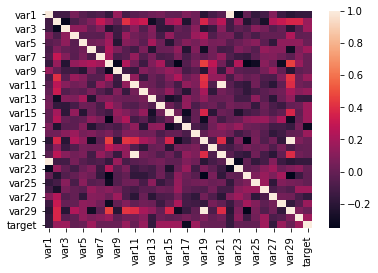

In [3]:
#просмотр корреляции между переменными
sns.heatmap(df.corr())

In [4]:
#так как у var1 есть корреляция с другими переменными, она будет удалена
df.drop('var1',axis=1,inplace=True)

In [5]:
df_train,df_test=train_test_split(df,test_size=0.3)
X_train=df_train.drop('target',axis=1)
y_train=df_train.target
X=X_train.copy()
y=y_train.copy()

In [6]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#определение значимых переменных с помощю RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe.fit(X_train, y_train)
for i in range(X_train.shape[1]):
     print('Column: %s, Selected=%s, Rank: %d' % (X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
X_train_new=X_train[X_train.columns[rfe.support_]]

Column: var2, Selected=False, Rank: 16
Column: var3, Selected=True, Rank: 1
Column: var4, Selected=False, Rank: 5
Column: var5, Selected=False, Rank: 10
Column: var6, Selected=False, Rank: 9
Column: var7, Selected=False, Rank: 3
Column: var8, Selected=False, Rank: 15
Column: var9, Selected=False, Rank: 4
Column: var10, Selected=True, Rank: 1
Column: var11, Selected=False, Rank: 19
Column: var12, Selected=True, Rank: 1
Column: var13, Selected=True, Rank: 1
Column: var14, Selected=True, Rank: 1
Column: var15, Selected=False, Rank: 11
Column: var16, Selected=False, Rank: 17
Column: var17, Selected=True, Rank: 1
Column: var18, Selected=True, Rank: 1
Column: var19, Selected=False, Rank: 18
Column: var20, Selected=False, Rank: 13
Column: var21, Selected=False, Rank: 8
Column: var22, Selected=True, Rank: 1
Column: var23, Selected=False, Rank: 12
Column: var24, Selected=False, Rank: 14
Column: var25, Selected=False, Rank: 7
Column: var26, Selected=False, Rank: 6
Column: var27, Selected=True, R

In [7]:
X_train_new.columns

Index(['var3', 'var10', 'var12', 'var13', 'var14', 'var17', 'var18', 'var22',
       'var27', 'var28'],
      dtype='object')

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model_tree = RandomForestClassifier()
model_tree.fit(X_train_new,y_train)

RandomForestClassifier()

In [9]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_new,y_train)

LogisticRegression()

In [10]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier()
model_bag.fit(X_train_new,y_train)

BaggingClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {
'max_features': [2, 3, 4, 5, 6, 7],'n_estimators': [80, 90, 100, 110, 120]
}
gcv = GridSearchCV(model_bag, parameters, n_jobs=-1, cv=10, verbose=1) 
gcv.fit(X_train_new, y)
gcv.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'max_features': 7, 'n_estimators': 120}

In [12]:
X_test=df_test.drop('target',axis=1)
y_test=df_test.target
X_test_new=X_test[X_test.columns[rfe.support_]]
#создание датафрейма для сравнения результатов каждой модели
df_results=pd.DataFrame()
df_results=df_results.append(pd.Series(['Random Forest',roc_auc_score(y_train,model_tree.predict(X_train_new)),roc_auc_score(y_test,model_tree.predict(X_test_new))]),ignore_index=True)
df_results=df_results.append(pd.Series(['Bagging Classifier',roc_auc_score(y_train,model_bag.predict(X_train_new)),roc_auc_score(y_test,model_bag.predict(X_test_new))]),ignore_index=True)
df_results=df_results.append(pd.Series(['Logistic Regression',roc_auc_score(y_train,log.predict(X_train_new)),roc_auc_score(y_test,log.predict(X_test_new))]),ignore_index=True)
df_results=df_results.append(pd.Series(['GridSearchCV',roc_auc_score(y_train,gcv.predict(X_train_new)),roc_auc_score(y_test,gcv.predict(X_test_new))]),ignore_index=True)
df_results.columns=['model','train','test']
df_results

,model,train,test
0,Random Forest,1.000000,0.857485
1,Bagging Classifier,0.992415,0.833792
2,Logistic Regression,0.758201,0.754609
3,GridSearchCV,1.000000,0.853135


Из результатов видно что Random Forest имеет наиболее высокий балл roc auc 